<a href="https://colab.research.google.com/github/wldbsdk/2025-1--myclass-BDA/blob/main/inclass/05w_B_wed_0402_easy_ch05_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 05주차 수업

In [1]:
import numpy as np
import pandas as pd

In [3]:
df_raw = pd.DataFrame({'var1' : [1, 2, 1],
                       'var2' : [2, 3, 2],
                       'var3' : [10, 20, 30]})

df_raw

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [6]:
df_new = df_raw.copy()
df_new

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [8]:
id(df_new) == id(df_raw)


False

In [9]:
df_new.rename(columns = {'var2 ': 'v2'})

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [10]:
df_new

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [11]:
df_new.rename(columns = {'var2 ': 'v2'}, inplace = True)
df_new

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [12]:
df_raw

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [15]:
df_new.rename(index = {0 : 'x', 1: 'y', 2: 'z'}, inplace = True)
df_new

,var1,var2,var3
x,1,2,10
y,2,3,20
z,1,2,30


In [17]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
df.rename(columns={"A":"a", "B":"c"})

,a,c
0,1,4
1,2,5
2,3,6


In [18]:
df

,A,B
0,1,4
1,2,5
2,3,6


## 파생 변수 생성

In [19]:
df = pd.DataFrame({'var1' : [4, 3, 8],
                   'var2': [2, 6, 1]})
df

,var1,var2
0,4,2
1,3,6
2,8,1


In [21]:
df1 =df.copy()

In [23]:
df1

,var1,var2
0,4,2
1,3,6
2,8,1


In [24]:
df1['var1'] + df1['var2']

,0
0,6
1,9
2,9


In [25]:
df1['var_sum'] = df1['var1'] + df1['var2']
df1

,var1,var2,var_sum
0,4,2,6
1,3,6,9
2,8,1,9


In [26]:
df1['var_sum'] = df1['var1'] + df1['var2'] / 2
df1

,var1,var2,var_sum
0,4,2,5.0
1,3,6,6.0
2,8,1,8.5


In [27]:
df2 = df.copy()
df2

,var1,var2
0,4,2
1,3,6
2,8,1


In [28]:
df2.sum()

,0
var1,15
var2,9


In [29]:
df2.sum(axis=1)

,0
0,6
1,9
2,9


In [30]:
df2['var_sum'] = df2.sum(axis=1)
df2

,var1,var2,var_sum
0,4,2,6
1,3,6,9
2,8,1,9


In [31]:
df2['var_sum'] = df2.sum(axis='columns')
df2

,var1,var2,var_sum
0,4,2,12
1,3,6,18
2,8,1,18


In [32]:
df2[['var1', 'var2']]

,var1,var2
0,4,2
1,3,6
2,8,1


In [33]:
df2[['var1', 'var2']].mean()

,0
var1,5.0
var2,3.0


In [34]:
df2[['var1', 'var2']].mean(axis=1)

,0
0,3.0
1,4.5
2,4.5


In [35]:
df2['var_mean'] = df2[['var1', 'var2']].mean(axis=1)
df2

,var1,var2,var_sum,var_mean
0,4,2,12,3.0
1,3,6,18,4.5
2,8,1,18,4.5


In [36]:
df1

,var1,var2,var_sum
0,4,2,5.0
1,3,6,6.0
2,8,1,8.5


## mpg 연비 변수 생성

In [42]:
! git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 2.14 MiB | 5.53 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [43]:
mpg = pd.read_csv('data/mpg.csv')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [44]:
mpg.sample(8)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
181,toyota,camry,2.4,2008,4,manual(m5),f,21,31,r,midsize
214,volkswagen,jetta,2.0,1999,4,auto(l4),f,19,26,r,compact
11,audi,a4 quattro,2.8,1999,6,auto(l5),4,15,25,p,compact
102,honda,civic,1.6,1999,4,manual(m5),f,23,29,p,subcompact
233,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize
13,audi,a4 quattro,3.1,2008,6,auto(s6),4,17,25,p,compact
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
107,honda,civic,2.0,2008,4,manual(m6),f,21,29,p,subcompact


In [47]:
mpg.total = (mpg.cty + mpg.hwy) / 2
mpg.head()

<ipython-input-47-0e68e0222155>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  mpg.total = (mpg.cty + mpg.hwy) / 2


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [48]:
mpg['total'] = (mpg.cty + mpg.hwy) / 2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [50]:
mpg['mpg_mean'] = mpg[['cty', 'hwy']].mean(axis='columns')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,21.0


In [51]:
sum(mpg.total) / len(mpg)

20.14957264957265

In [52]:
mpg.total.mean()

np.float64(20.14957264957265)

In [53]:
mpg['total'].mean()

np.float64(20.14957264957265)

## 조건문 활용

In [56]:
mpg.total.describe()

,0
count,234.000000
mean,20.149573
std,5.050290
min,10.500000
25%,15.500000
50%,20.500000
75%,23.500000
max,39.500000


<Axes: ylabel='Frequency'>

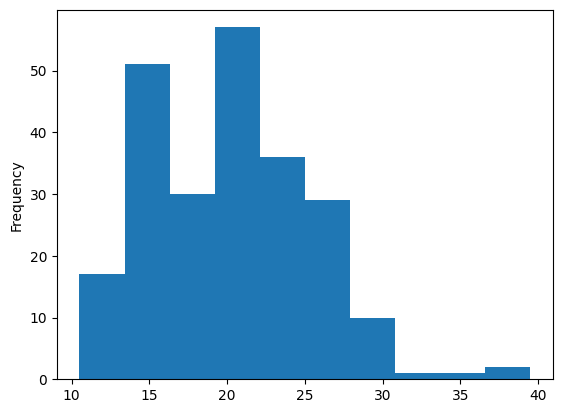

In [57]:
mpg.total.plot.hist()

In [61]:
! pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 55.5 MB/s eta 0:00:00


In [63]:
import koreanize_matplotlib

<Axes: title={'center': '히스토그램'}, ylabel='Frequency'>

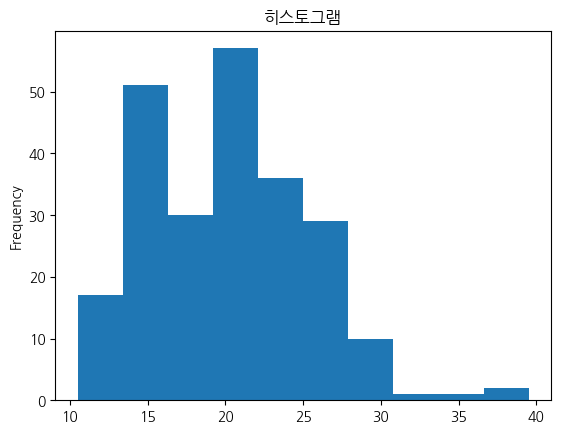

In [64]:
mpg['total'].plot(kind="hist", title="히스토그램")

<Axes: xlabel='total', ylabel='Count'>

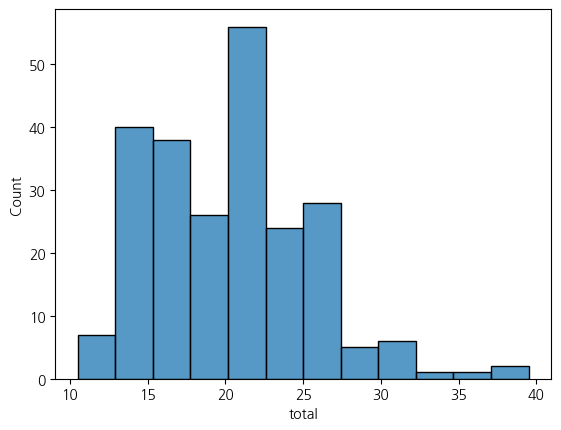

In [65]:
import seaborn as sns
sns.histplot(mpg, x='total')

In [67]:
np.where(30 >= 5, 'pass', 'fail')

array('pass', dtype='<U4')

In [68]:
np.where(30 <= 5, 'pass', 'fail')

array('fail', dtype='<U4')

In [70]:
mpg['test'] = np.where(mpg.total >= 20, 'pass', 'fail')
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean,test
217,volkswagen,jetta,2.5,2008,5,auto(s6),f,21,29,r,compact,25.0,25.0,pass
111,hyundai,sonata,2.4,2008,4,manual(m5),f,21,31,r,midsize,26.0,26.0,pass
106,honda,civic,1.8,2008,4,auto(l5),f,24,36,c,subcompact,30.0,30.0,pass
158,pontiac,grand prix,5.3,2008,8,auto(s4),f,16,25,p,midsize,20.5,20.5,pass
155,pontiac,grand prix,3.8,1999,6,auto(l4),f,16,26,p,midsize,21.0,21.0,pass


In [72]:
mpg.test.value_counts()

,count
test,
pass,128
fail,106


In [73]:
type(mpg.test.value_counts())

pandas.core.series.Series

<Axes: xlabel='test'>

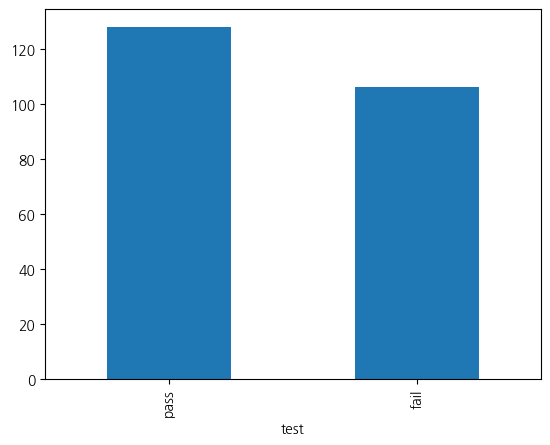

In [74]:
mpg.test.value_counts().plot.bar()

<Axes: xlabel='test'>

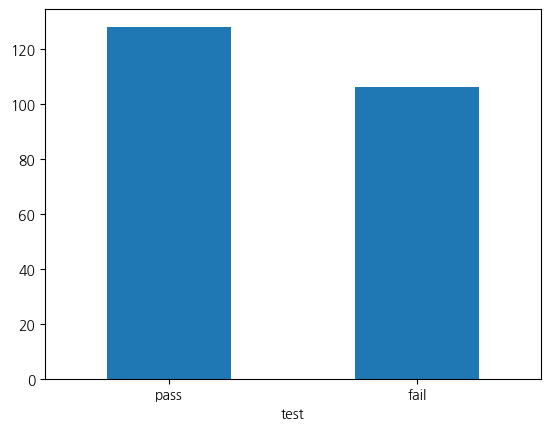

In [75]:
mpg.test.value_counts().plot.bar(rot=0)

<Axes: xlabel='test', ylabel='count'>

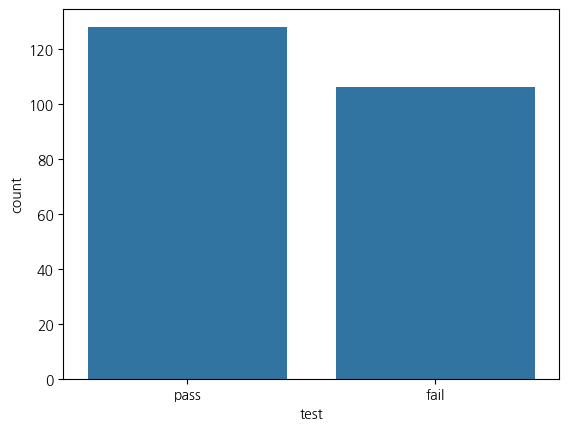

In [76]:
sns.countplot(mpg, x='test')

<Axes: xlabel='test', ylabel='count'>

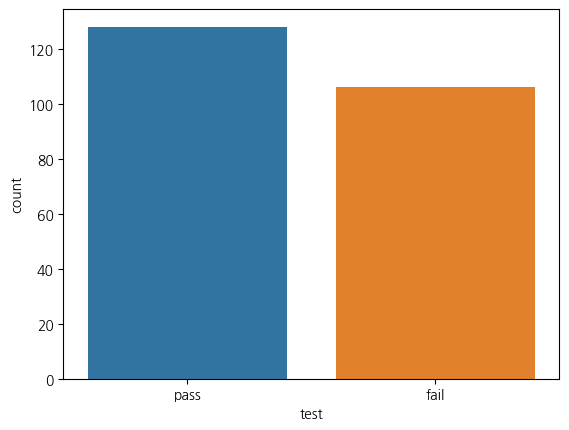

In [77]:
sns.countplot(mpg, x='test', hue='test')

<Axes: xlabel='test', ylabel='percent'>

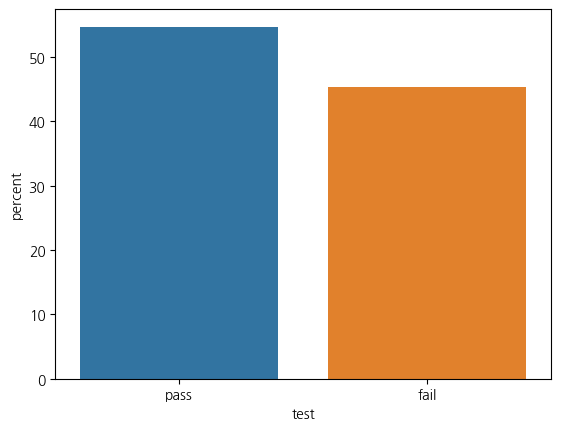

In [79]:
sns.countplot(mpg, x='test', hue='test', stat='percent')

<Axes: xlabel='test', ylabel='percent'>

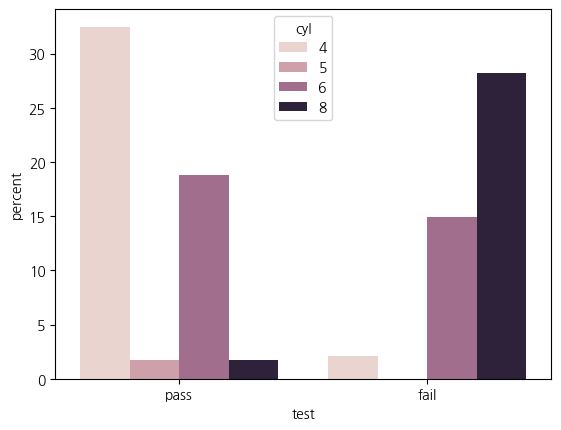

In [80]:
sns.countplot(mpg, x='test', hue='cyl', stat='percent')

<Axes: xlabel='test', ylabel='percent'>

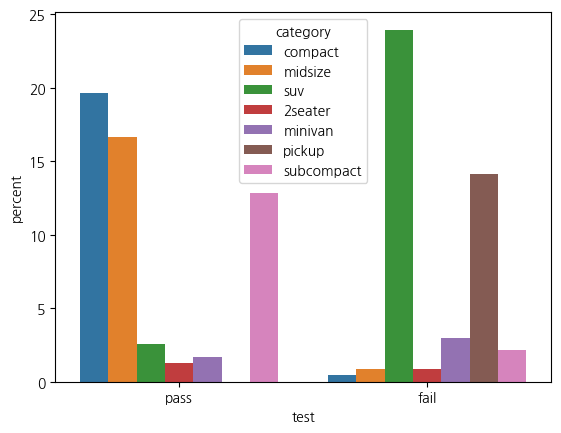

In [81]:
sns.countplot(mpg, x='test', hue='category', stat='percent')

In [82]:
np.where(mpg.total >= 30, 'A', 'B')

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B',
       'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B

In [83]:
np.where(mpg.total >= 30, 'A', np.where(mpg.total >= 20, 'B', 'C'))

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'C', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'B', 'C', 'B',
       'B', 'C', 'C', 'C', 'C', 'C', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'C', 'C', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'B',
       'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'A', 'B', 'B', 'B', 'B',
       'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'B', 'B

In [84]:
mpg['grade'] = np.where(mpg.total >= 30, 'A', np.where(mpg.total >= 20, 'B', 'C'))
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean,test,grade
213,volkswagen,jetta,2.0,1999,4,manual(m5),f,21,29,r,compact,25.0,25.0,pass,B
125,jeep,grand cherokee 4wd,4.7,1999,8,auto(l4),4,14,17,r,suv,15.5,15.5,fail,C
204,toyota,toyota tacoma 4wd,3.4,1999,6,auto(l4),4,15,19,r,pickup,17.0,17.0,fail,C
164,subaru,forester awd,2.5,2008,4,auto(l4),4,18,23,p,suv,20.5,20.5,pass,B
80,ford,explorer 4wd,4.0,2008,6,auto(l5),4,13,19,r,suv,16.0,16.0,fail,C


In [87]:
n_grade = mpg.grade.value_counts()
n_grade

,count
grade,
B,118
C,106
A,10


<Axes: xlabel='grade'>

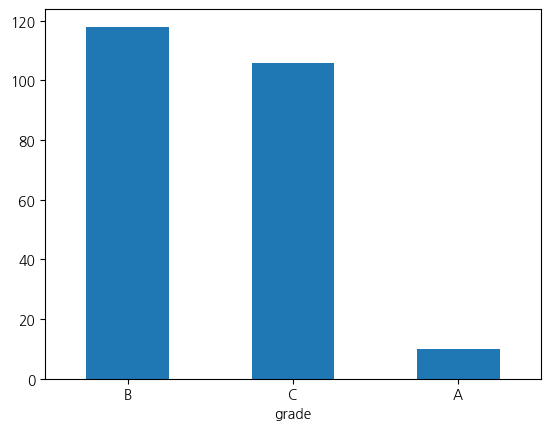

In [88]:
n_grade.plot.bar(rot=0)

In [89]:
n_grade = mpg.grade.value_counts().sort_index()
n_grade

,count
grade,
A,10
B,118
C,106


<Axes: xlabel='grade'>

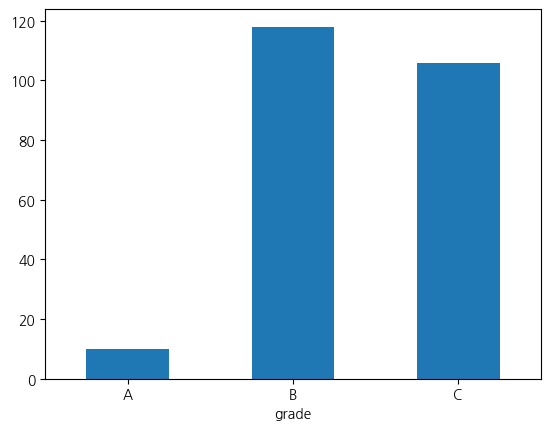

In [90]:
n_grade.plot.bar(rot=0)

<Axes: xlabel='grade', ylabel='count'>

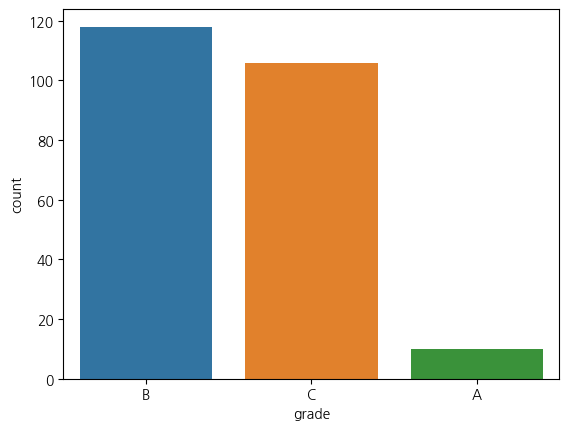

In [91]:
sns.countplot(mpg, x='grade', hue='grade')

<Axes: xlabel='grade', ylabel='percent'>

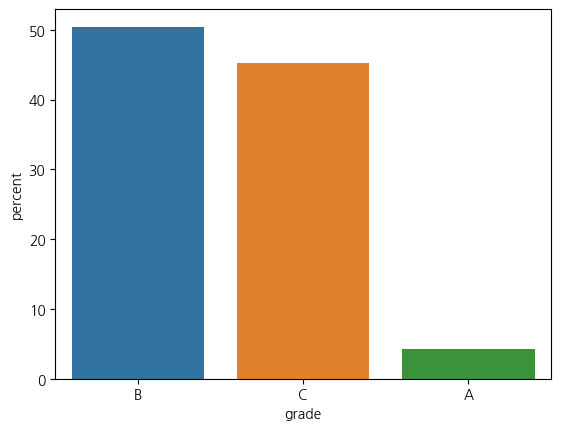

In [93]:
sns.countplot(mpg, x='grade', hue='grade', stat='percent')

In [95]:
mpg.total.value_counts().sort_index()

,count
10.5,5
12.5,2
13.0,10
13.5,3
14.0,7
14.5,3
15.0,17
15.5,13
16.0,8
16.5,5


In [96]:
mpg.grade.value_counts().sort_index()

,count
grade,
A,10
B,118
C,106


In [97]:
mpg.grade.value_counts().index

Index(['B', 'C', 'A'], dtype='object', name='grade')

In [98]:
mpg.grade.value_counts().sort_index().index

Index(['A', 'B', 'C'], dtype='object', name='grade')

<Axes: xlabel='grade', ylabel='percent'>

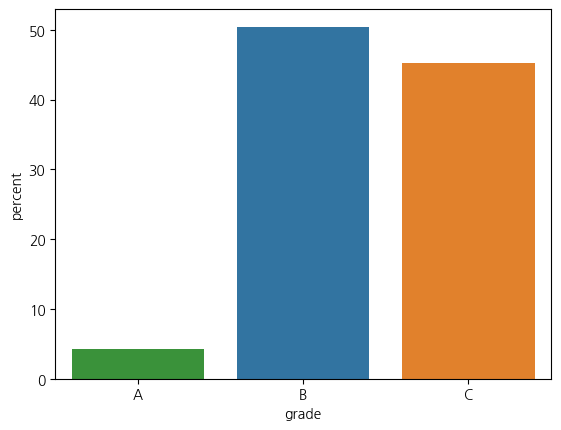

In [99]:
sns.countplot(mpg, x='grade', hue='grade', stat='percent', order=mpg.grade.value_counts().sort_index().index)

<Axes: xlabel='grade', ylabel='percent'>

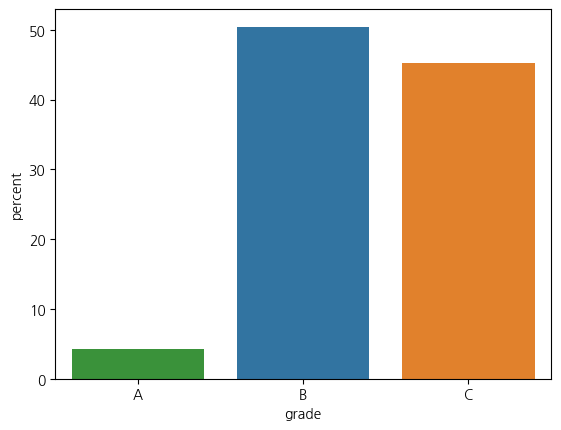

In [100]:
sns.countplot(mpg, x='grade', hue='grade', stat='percent', order=['A', 'B', 'C'])

In [101]:
mpg.grade.unique()

array(['B', 'C', 'A'], dtype=object)

In [102]:
np.sort(mpg.grade.unique())

array(['A', 'B', 'C'], dtype=object)

<Axes: xlabel='grade', ylabel='percent'>

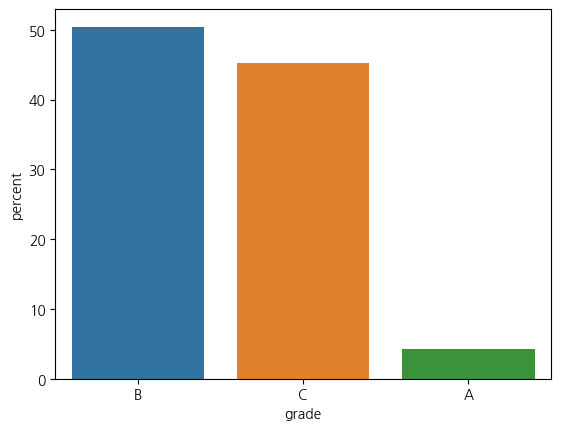

In [103]:
sns.countplot(mpg, x='grade', hue='grade', stat='percent', order=mpg.grade.unique())

## 메소드 체이닝

In [104]:
mpg.grade.value_counts().sort_index()

,count
grade,
A,10
B,118
C,106


In [105]:
d = mpg.grade.value_counts().sort_index()
d.sort_index()

,count
grade,
A,10
B,118
C,106


In [107]:
mpg.grade.value_counts().sort_index(ascending=False)

,count
grade,
C,106
B,118
A,10


In [109]:
mpg['grade2'] = np.where(mpg.total >= 30, 'A',
                np.where(mpg.total >= 25, 'B',
                np.where(mpg.total >= 20, 'C', 'D')))
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean,test,grade,grade2
143,nissan,altima,2.5,2008,4,auto(av),f,23,31,r,midsize,27.0,27.0,pass,B,B
172,subaru,impreza awd,2.5,2008,4,manual(m5),4,20,27,r,compact,23.5,23.5,pass,B,C
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,22.5,22.5,pass,B,C
109,hyundai,sonata,2.4,1999,4,manual(m5),f,18,27,r,midsize,22.5,22.5,pass,B,C
165,subaru,impreza awd,2.2,1999,4,auto(l4),4,21,26,r,subcompact,23.5,23.5,pass,B,C


## 연산자 |(or) 메소드 isin

In [118]:
mpg['size'] = np.where((mpg.category == 'compact') |
                       (mpg.category == 'subcompact') |
                       (mpg.category == '2seater'), 'small', 'large')
mpg.sample(3)

,company,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,test,size
69,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup,10.5,fail,large
105,honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact,30.5,pass,small
33,chevrolet,malibu,2.4,2008,4,auto(l4),f,22,30,r,midsize,26.0,pass,large


In [119]:
mpg['size'].value_counts()

,count
size,
large,147
small,87


In [115]:
mpg['size'] = np.where(mpg.category.isin(['compact', 'subcompact', '2seater']), 'small', 'large')
mpg['size'].value_counts()

,count
size,
large,147
small,87


## 정리하기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


<Axes: xlabel='test'>

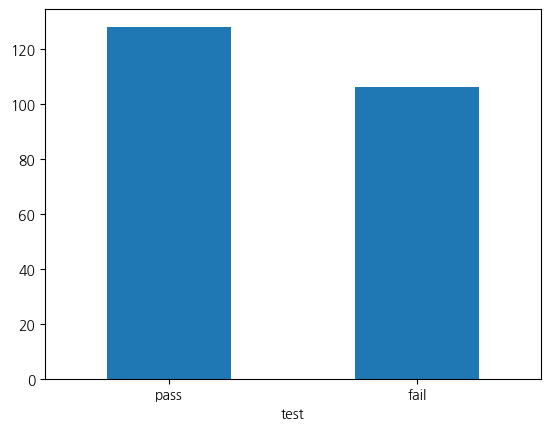

In [116]:
import pandas as pd
import numpy as np

# 2. 데이터 불러오기
mpg = pd.read_csv('data/mpg.csv')

# 3. 데이터 파악하기
mpg.shape       # 행, 열 수
mpg.head()      # 데이터 앞부분
mpg.tail()      # 데이터 뒷부분
mpg.info()      # 속성
mpg.describe()  # 요약 통계량

# 4. 변수명 바꾸기
mpg = mpg.rename(columns = {'manufacturer' : 'company'})

# 5. 파생변수 만들기
mpg['total'] = (mpg['cty'] + mpg['hwy'])/2                  # 변수 조합
mpg['test'] = np.where(mpg['total'] >= 20, 'pass', 'fail')  # 조건문 활용

# 6. 빈도 확인하기
count_test = mpg['test'].value_counts()  # 빈도표 만들기
count_test.plot.bar(rot = 0)             # 빈도 막대 그래프 만들기

## 단원 06

In [120]:
import pandas as pd

exam = pd.read_csv('data/exam.csv')
exam.sample(5)

,id,nclass,math,english,science
11,12,3,45,85,32
10,11,3,65,65,65
5,6,2,50,89,98
17,18,5,80,78,90
19,20,5,78,83,58


In [121]:
exam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       20 non-null     int64
 1   nclass   20 non-null     int64
 2   math     20 non-null     int64
 3   english  20 non-null     int64
 4   science  20 non-null     int64
dtypes: int64(5)
memory usage: 932.0 bytes


In [122]:
exam.sample()

,id,nclass,math,english,science
6,7,2,80,90,45


In [124]:
exam.sample(frac=.2)

,id,nclass,math,english,science
7,8,2,90,78,25
0,1,1,50,98,50
13,14,4,48,87,12
4,5,2,25,80,65


In [127]:
exam.query

<bound method DataFrame.query of     id  nclass  math  english  science
0    1       1    50       98       50
1    2       1    60       97       60
2    3       1    45       86       78
3    4       1    30       98       58
4    5       2    25       80       65
5    6       2    50       89       98
6    7       2    80       90       45
7    8       2    90       78       25
8    9       3    20       98       15
9   10       3    50       98       45
10  11       3    65       65       65
11  12       3    45       85       32
12  13       4    46       98       65
13  14       4    48       87       12
14  15       4    75       56       78
15  16       4    58       98       65
16  17       5    65       68       98
17  18       5    80       78       90
18  19       5    89       68       87
19  20       5    78       83       58>

In [123]:
exam.query('nclass == 1')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [125]:
exam.query('nclass == 2')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [128]:
exam.query('nclass != 2')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65
13,14,4,48,87,12


In [130]:
exam[exam.nclass == 2]

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [131]:
exam.query('nclass == 2')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [132]:
exam.query('english >= 80')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
8,9,3,20,98,15
9,10,3,50,98,45
11,12,3,45,85,32


In [133]:
exam.query('english < 90 | science < 50')

,id,nclass,math,english,science
2,3,1,45,86,78
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
13,14,4,48,87,12


In [134]:
# 1, 3, 5반에 해당하면 추출
exam.query('nclass == 1 | nclass == 3 | nclass == 5')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [135]:
3 in [1, 2, 3, 4]

True

In [136]:
exam.query('nclass in [1, 3, 5]')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [138]:
exam[exam.nclass.isin([1, 3, 5])]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [144]:
nclass1 = exam.query('nclass == 1')
nclass1

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [145]:
nclass2 = exam.query('nclass == 2')
nclass2

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [146]:
nclass1.math.mean()

np.float64(46.25)

In [147]:
nclass2.english.mean()

np.float64(84.25)

In [148]:
df = pd.DataFrame({'sex'     : ['F', 'M', 'F', 'M'],
                   'country' : ['Korea', 'China', 'Japan', 'USA']})
df

,sex,country
0,F,Korea
1,M,China
2,F,Japan
3,M,USA


In [150]:
df.query('sex=="F" & country=="Korea"')

,sex,country
0,F,Korea


In [151]:
var = 3
exam.query('nclass == @var')

,id,nclass,math,english,science
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32


In [154]:
var = 3
exam.query(f'nclass == {var}')

,id,nclass,math,english,science
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32


In [155]:
df = pd.DataFrame({'num_legs': [2, 4], 'num_wings': [2, 0]},
                  index=['falcon', 'dog'])
df

,num_legs,num_wings
falcon,2,2
dog,4,0


In [156]:
df.isin([0, 4])

,num_legs,num_wings
falcon,False,False
dog,True,True


In [157]:
~df.isin([0, 4])

,num_legs,num_wings
falcon,True,True
dog,False,False


In [162]:
exam.columns

Index(['id', 'nclass', 'math', 'english', 'science'], dtype='object')

In [163]:
exam.columns[2]

'math'

In [164]:
exam[exam.columns[2]]

,math
0,50
1,60
2,45
3,30
4,25
5,50
6,80
7,90
8,20
9,50


In [165]:
exam['math']

,math
0,50
1,60
2,45
3,30
4,25
5,50
6,80
7,90
8,20
9,50


In [166]:
exam.columns[1:3]

Index(['nclass', 'math'], dtype='object')

In [167]:
exam[exam.columns[1:3]]

,nclass,math
0,1,50
1,1,60
2,1,45
3,1,30
4,2,25
5,2,50
6,2,80
7,2,90
8,3,20
9,3,50


In [168]:
exam[['nclass', 'math']]

,nclass,math
0,1,50
1,1,60
2,1,45
3,1,30
4,2,25
5,2,50
6,2,80
7,2,90
8,3,20
9,3,50


In [169]:
exam.drop(columns=["math", 'english'])

,id,nclass,science
0,1,1,50
1,2,1,60
2,3,1,78
3,4,1,58
4,5,2,65
5,6,2,98
6,7,2,45
7,8,2,25
8,9,3,15
9,10,3,45


In [170]:
exam

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [171]:
exam.drop(2)

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65


In [172]:
exam.drop([2, 4, 6])

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
5,6,2,50,89,98
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65


In [176]:
exam

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [178]:
exam.query('nclass == 1')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [179]:
exam.query('nclass == 1')['math']

,math
0,50
1,60
2,45
3,30


In [181]:
exam.query('nclass == 1')[['math']]

,math
0,50
1,60
2,45
3,30


In [182]:
exam.query('nclass == 1')[['math', 'english']]

,math,english
0,50,98
1,60,97
2,45,86
3,30,98


In [183]:
exam.query('math >= 50')[['id', 'math']]

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90
9,10,50
10,11,65
14,15,75
15,16,58
16,17,65


In [184]:
exam[exam.math >= 50][['id', 'math']]

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90
9,10,50
10,11,65
14,15,75
15,16,58
16,17,65


In [185]:
exam[exam.math >= 50][['id', 'math']].head()

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90


In [186]:
exam[exam.math >= 50] \
    [['id', 'math']] \
    .head()

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90


## 정렬

In [187]:
exam.sort_values('math', ascending=False)

,id,nclass,math,english,science
7,8,2,90,78,25
18,19,5,89,68,87
6,7,2,80,90,45
17,18,5,80,78,90
19,20,5,78,83,58
14,15,4,75,56,78
10,11,3,65,65,65
16,17,5,65,68,98
1,2,1,60,97,60
15,16,4,58,98,65


In [188]:
exam.sort_values('math', ascending=False).head()

,id,nclass,math,english,science
7,8,2,90,78,25
18,19,5,89,68,87
6,7,2,80,90,45
17,18,5,80,78,90
19,20,5,78,83,58


In [189]:
exam.sort_values('math', ascending=False).head(7)

,id,nclass,math,english,science
7,8,2,90,78,25
18,19,5,89,68,87
6,7,2,80,90,45
17,18,5,80,78,90
19,20,5,78,83,58
14,15,4,75,56,78
10,11,3,65,65,65


In [191]:
exam.sort_values(['nclass', 'math']).head(7)

,id,nclass,math,english,science
3,4,1,30,98,58
2,3,1,45,86,78
0,1,1,50,98,50
1,2,1,60,97,60
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45


In [192]:
exam.sort_values(['nclass', 'math'], ascending=False).head(7)

,id,nclass,math,english,science
18,19,5,89,68,87
17,18,5,80,78,90
19,20,5,78,83,58
16,17,5,65,68,98
14,15,4,75,56,78
15,16,4,58,98,65
13,14,4,48,87,12


In [194]:
exam.sort_values(['nclass', 'math'], ascending=[True, False]).head(10)

,id,nclass,math,english,science
1,2,1,60,97,60
0,1,1,50,98,50
2,3,1,45,86,78
3,4,1,30,98,58
7,8,2,90,78,25
6,7,2,80,90,45
5,6,2,50,89,98
4,5,2,25,80,65
10,11,3,65,65,65
9,10,3,50,98,45


In [195]:
exam.sort_index()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [196]:
exam.sort_index(ascending=False)

,id,nclass,math,english,science
19,20,5,78,83,58
18,19,5,89,68,87
17,18,5,80,78,90
16,17,5,65,68,98
15,16,4,58,98,65
14,15,4,75,56,78
13,14,4,48,87,12
12,13,4,46,98,65
11,12,3,45,85,32
10,11,3,65,65,65


In [197]:
exam.sort_index(ascending=False, axis=1)

,science,nclass,math,id,english
0,50,1,50,1,98
1,60,1,60,2,97
2,78,1,45,3,86
3,58,1,30,4,98
4,65,2,25,5,80
5,98,2,50,6,89
6,45,2,80,7,90
7,25,2,90,8,78
8,15,3,20,9,98
9,45,3,50,10,98


In [198]:
exam.sort_index(ascending=True, axis=1)

,english,id,math,nclass,science
0,98,1,50,1,50
1,97,2,60,1,60
2,86,3,45,1,78
3,98,4,30,1,58
4,80,5,25,2,65
5,89,6,50,2,98
6,90,7,80,2,45
7,78,8,90,2,25
8,98,9,20,3,15
9,98,10,50,3,45


## 종료